# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Kangni Wang
*   **Student number**: 1006783562



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

In [3]:
df = cases_raw
df

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549


In [4]:
columns = df.columns
columns

Index(['22-Jan', '23-Jan', '24-Jan', '25-Jan', '26-Jan', '27-Jan', '28-Jan',
       '29-Jan', '30-Jan', '31-Jan',
       ...
       '03-Oct', '04-Oct', '05-Oct', '06-Oct', '07-Oct', '08-Oct', '09-Oct',
       '10-Oct', '11-Oct', '12-Oct'],
      dtype='object', length=265)

In [5]:
index = df.index
index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=189)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? **[1]**

In [6]:
# Q1
# extract 10 countries data
names, countries = [],[]
for i in ['US', 'China', 'Canada', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',  
          'Antigua and Barbuda', 'Argentina']:
    df_each = df.loc[[i]]
    name = i
    y = df_each
    names.append(name)
    countries.append(y)

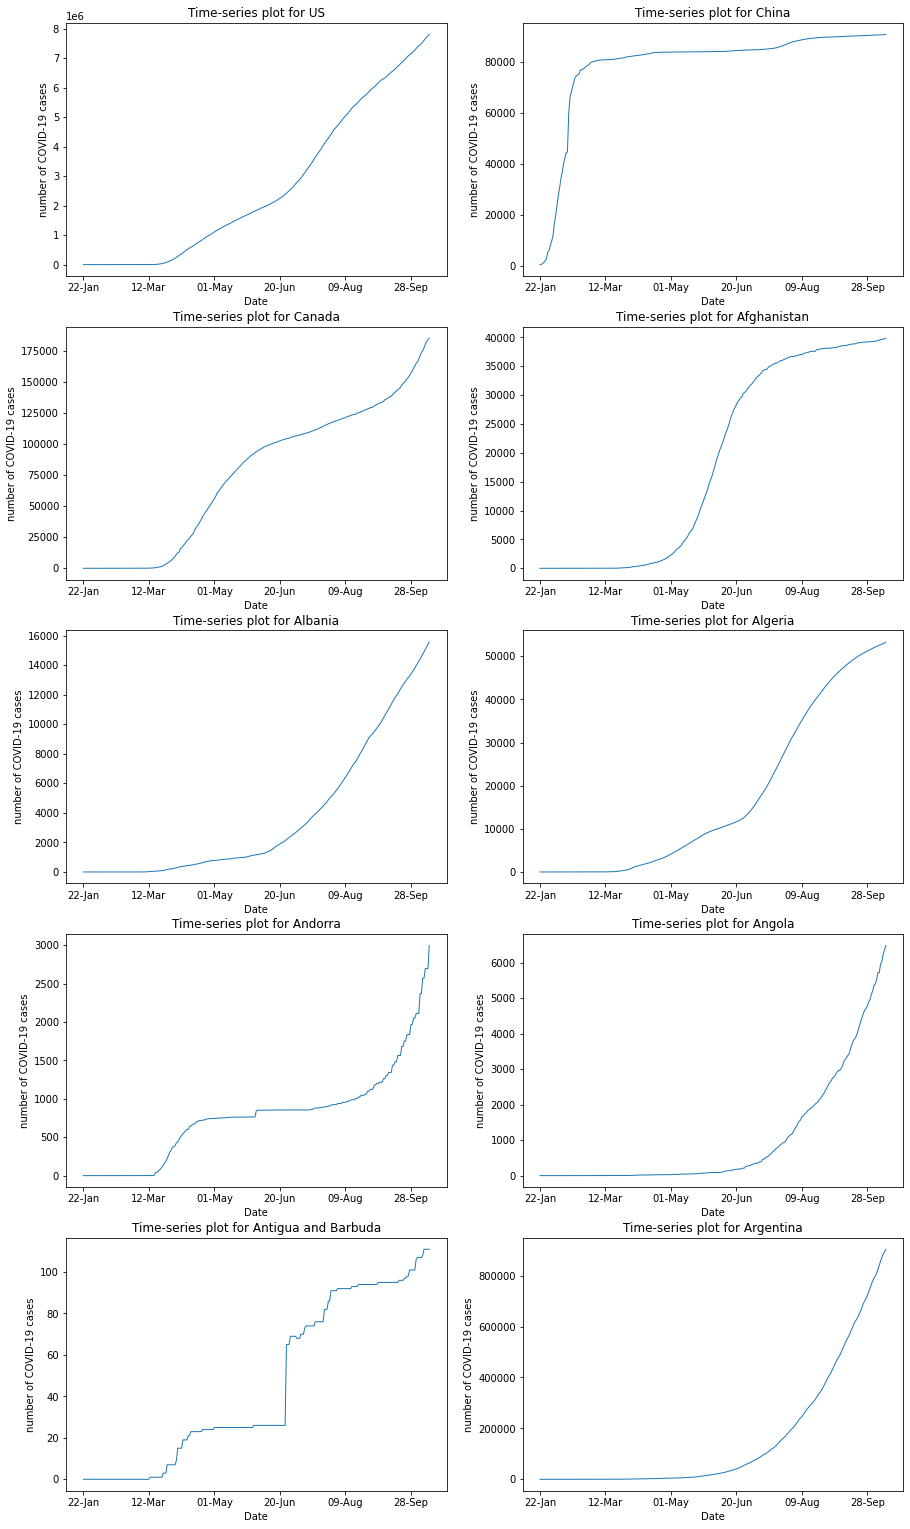

In [7]:
# subplots for 10 countries
fig = plt.figure()
plt.xlabel('date', fontsize=30);

for i in range(10):
    plt.subplot(5, 2, (i+1))
    df.loc[names[i],:].plot(figsize=(15,27), linewidth = 1, fontsize = 10)
    
    plt.xlabel('Date')
    plt.ylabel('number of COVID-19 cases')
    plt.title('Time-series plot for ' + names[i])

In [8]:
# Q2-standardize the data
X = df.values.astype(int)
X_std = StandardScaler().fit_transform(X)

In [9]:
# create a dataframe for standardized data
df_std = pd.DataFrame(X_std, columns = columns, index = index)
df_std

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.074935,-0.075240,-0.075753,-0.076591,-0.077541,-0.078838,-0.080415,...,-0.165118,-0.165791,-0.166255,-0.166596,-0.167228,-0.167782,-0.168450,-0.169066,-0.169633,-0.170059,-0.170348,-0.171044,-0.171496,-0.172028,-0.172584,-0.173154,-0.173495,-0.173683,-0.174326,-0.174775,-0.175313,-0.175965,-0.176586,-0.176931,-0.177226,-0.177913,-0.178325,-0.178943,-0.179485,-0.180050,-0.180448,-0.180843,-0.181674,-0.182245,-0.182862,-0.183560,-0.184207,-0.184782,-0.185131,-0.185964
Albania,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075417,-0.075930,-0.076766,-0.077715,-0.079012,-0.080587,...,-0.211653,-0.211596,-0.211397,-0.211232,-0.211465,-0.211477,-0.211509,-0.211477,-0.211366,-0.211174,-0.210975,-0.211173,-0.211072,-0.211053,-0.211039,-0.211040,-0.210846,-0.210685,-0.210844,-0.210823,-0.210993,-0.211118,-0.211261,-0.211162,-0.211110,-0.211402,-0.211397,-0.211576,-0.211657,-0.211781,-0.211700,-0.211763,-0.212315,-0.212526,-0.212768,-0.213101,-0.213395,-0.213555,-0.213634,-0.214183
Algeria,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075240,-0.075753,-0.076591,-0.077541,-0.078838,-0.080415,...,-0.153370,-0.153718,-0.153863,-0.153962,-0.154378,-0.154630,-0.155038,-0.155420,-0.155797,-0.156033,-0.156187,-0.156726,-0.157033,-0.157435,-0.157842,-0.158274,-0.158516,-0.158718,-0.159260,-0.159612,-0.160077,-0.160686,-0.161241,-0.161521,-0.161777,-0.162387,-0.162757,-0.163324,-0.163821,-0.164317,-0.164688,-0.165065,-0.165934,-0.166553,-0.167231,-0.167973,-0.168667,-0.169218,-0.169626,-0.170339
Andorra,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075417,-0.075930,-0.076766,-0.077715,-0.079012,-0.080587,...,-0.225797,-0.225743,-0.225612,-0.225569,-0.225867,-0.225994,-0.226052,-0.226106,-0.226006,-0.225911,-0.225835,-0.226019,-0.225994,-0.225967,-0.225986,-0.225890,-0.225766,-0.225704,-0.225779,-0.225805,-0.225930,-0.226075,-0.226129,-0.226039,-0.226015,-0.226209,-0.226242,-0.226350,-0.226501,-0.226634,-0.226602,-0.226753,-0.227065,-0.227349,-0.227423,-0.227838,-0.228056,-0.228293,-0.228473,-0.228786
Angola,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,

In [10]:
# extract 10 countries standardization data
names, countries = [],[]
for i in ['US', 'China', 'Canada', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',  
          'Antigua and Barbuda', 'Argentina']:
    df_each = df_std.loc[[i]]
    name = i
    y = df_each
    names.append(name)
    countries.append(y)

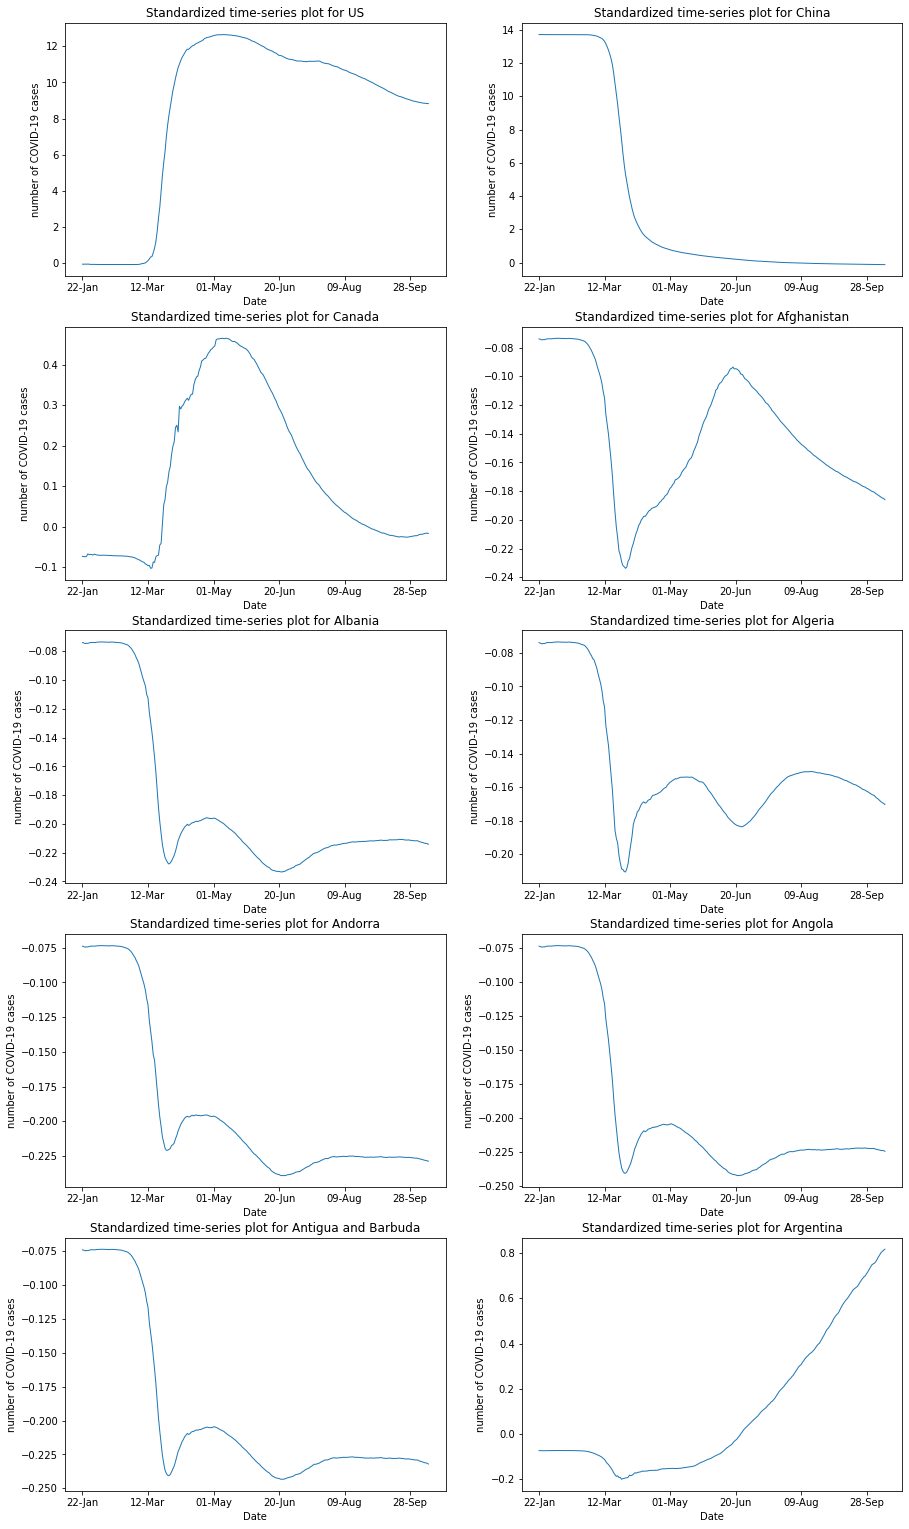

In [11]:
# Q3-subplots for 10 countries after standardization
fig = plt.figure()
plt.xlabel('date', fontsize=30);

for i in range(10):
    plt.subplot(5, 2, (i+1))
    df_std.loc[names[i],:].plot(figsize=(15,27), linewidth = 1, fontsize = 10)
    
    plt.xlabel('Date')
    plt.ylabel('number of COVID-19 cases')
    plt.title('Standardized time-series plot for ' + names[i])

### Q4
For US: no change at the beginning, but starting from March, the total number of COVID-19 cases started to grow up dramatically and reached peak in May, then the trend goes down slowly.

For China: the number of COVID-19 case shows a monotonically decreasing trend, and it decreased dramatically around April and decreased slowly afterwards. 

For Canada, no change at the beginning until March, but the number of COVID-19 cases increased rapidly and it reached peak in May. After that, the number of cases decrease rapidly. But at the end of September, it shows an upward trend. 

The trend going up shows a larger proportion of COVID-19 cases in the world, the trend going down shows a smaller proportion of cases in the world. 

The negative value means the number of cases at the end of that day of that country is below than the average number of cases of that day across the world. 


# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]**
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [12]:
# Q1-Compute the covariance matrix of the dataframe
mean = X.mean(axis=0)

#use svd to calculate eigenvalues and eigenvectorsd
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1)

In [13]:
C.shape

(265, 265)

In [14]:
# Q2-Compute eigenvalues and eigenvectors
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.79748680e-02
   1.24541889e-01 -5.44783129e-03]
 [-2.98377995e-02  5.94720401e-02 -1.01020935e-02 ...  3.79902133e-02
   1.24541683e-01 -5.42558367e-03]
 [ 7.58303486e-03 -4.08175495e-02 -9.16715737e-03 ...  3.78644184e-02
   1.24547692e-01 -5.47420297e-03]
 ...
 [ 1.10861783e-03  4.27225319e-05  8.26251408e-03 ...  8.33006433e-02
  -1.58149961e-02 -6.72209362e-02]
 [-8.68838851e-03  6.67246624e-03 -4.63488489e-04 ...  8.33438265e-02
  -1.58156089e-02 -6.71797242e-02]
 [ 1.00891006e-02 -2.20403562e-02 -1.00950276e-02 ...  8.29795840e-02
  -1.57812604e-02 -6.71748520e-02]]  
 Eig Val: 
 [-4.73661828e-14 -4.71024978e-14 -3.97583791e-14 -3.94822332e-14
 -2.87802640e-14 -2.48007766e-14 -2.07801531e-14 -1.74123052e-14
 -1.27948362e-14 -1.16022729e-14 -8.83018825e-15 -7.49106463e-15
 -5.68979930e-15 -4.68478123e-15 -4.01995794e-15 -3.87548993e-15
 -3.82978563e-15 -3.42862784e-15 -3.33829999e-15 -2.97109047e-15
 -2.77368214e-

In [15]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [16]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#cumExpVar

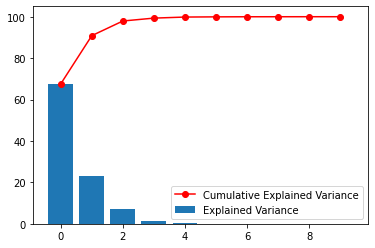

In [17]:
# Q3 scree plot
plt.bar(range(10), expVar[:10], label='Explained Variance')
plt.plot(cumExpVar[:10], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [18]:
# Q4-How many PCs do you need to cover 99% of the dataset's variance?
for i in range(10):
    if cumExpVar[:10][i] >= 99.0:
        #print(i+1)
        break
print('We need {} PCs to cover 99% of the variance'.format(i+1))
# Thus, We need 4 PCs to cover 99% of the dataset's variance.

We need 4 PCs to cover 99% of the variance


In [19]:
# Create a dataframe for all eigenVectors in order to plot first 20 eigenVectors(PCs)
df_eV = pd.DataFrame(eigenVectors, columns = range(1, 266))
df_eV

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,-0.005448,0.124542,0.037975,-0.042277,0.040707,-0.029712,0.052259,0.035798,-0.024552,0.043441,-0.005002,0.001188,-0.000610,-0.002922,-0.022923,0.116859,0.087632,0.011422,-0.076494,-0.023562,0.005152,-0.010308,0.135265,-0.079163,0.107229,-0.118899,0.067016,0.019918,0.163544,-0.150250,0.034106,0.194978,0.152569,-0.038092,-0.230904,-0.327403,-0.048049,0.304486,0.105678,0.212876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.005426,0.124542,0.037990,-0.042293,0.040700,-0.029681,0.052852,0.037026,-0.025233,0.045398,-0.005124,0.000850,0.003288,-0.004201,-0.023924,0.141398,0.092098,-0.001362,-0.080944,-0.039525,0.040645,0.029267,0.173177,-0.254823,0.204487,-0.119546,0.036395,0.033822,0.075994,-0.005680,0.024348,0.071043,0.074331,0.153504,-0.117219,-0.298708,0.003153,-0.271728,0.018404,0.056265,...,0.000916,0.001550,-0.001511,0.004062,-0.002712,-0.003239,0.007372,-0.001640,0.013517,0.003059,-0.001113,0.030120,0.002139,-0.001803,-0.001839,-0.000526,-0.008892,0.002543,-0.005978,0.004015,0.003534,0.002789,-0.004576,-0.001582,0.001937,0.013385,-0.001453,-0.012953,0.003769,0.002382,0.023480,-0.035623,0.028631,-0.010742,-0.032591,0.038123,0.017758,-0.010102,0.059472,-0.029838
2,-0.005474,0.124548,0.037864,-0.042218,0.040905,-0.029230,0.052501,0.033208,-0.032500,0.033780,-0.007895,-0.022116,0.000845,-0.012997,-0.014732,0.170242,0.101600,0.001826,-0.063989,-0.061037,0.074578,0.056283,0.190586,-0.365556,0.236789,-0.082068,-0.007623,0.039854,-0.053509,0.142638,-0.016417,-0.049396,-0.040051,0.178005,0.050736,-0.045160,0.015717,-0.280775,-0.017560,-0.020161,...,0.004676,0.005333,0.000223,-0.000631,0.000376,0.000879,-0.004513,-0.002400,-0.010367,-0.005079,0.002003,-0.035364,-0.001532,0.000379,0.000255,-0.004794,0.007669,0.002572,0.004490,0.002479,0.011877,-0.002967,-0.000809,-0.003782,-0.007640,-0.022688,-0.002439,0.048082,0.018382,-0.001414,-0.019104,-0.000827,-0.019550,-0.015271,0.024468,-0.027060,-0.027813,-0.009167,-0.040818,0.007583
3,-0.005428,0.124550,0.037916,-0.042132,0.040794,-0.029540,0.054092,0.034408,-0.034951,0.039104,-0.011196,-0.020539,-0.004385,-0.014093,-0.011569,0.151543,0.103641,0.009507,-0.057735,-0.048920,0.032174,0.028055,0.130011,-0.249780,0.164934,-0.032834,-0.065439,0.077911,-0.054291,-0.058864,0.012470,-0.112867,-0.133037,-0.120315,0.066791,0.172705,0.116566,-0.080833,-0.102545,-0.206554,...,-0.003436,-0.012934,-0.006838,0.002021,-0.000999,0.009040,0.008993,0.008133,-0.011275,0.001094,-0.010243,0.030289,0.007488,0.001921,0.003578,0.016849,0.003584,0.008246,0.003880,0.006244,-0.021628,-0.004644,0.022886,-0.001291,0.011230,0.004773,0.013119,0.014511,-0.014512,-0.019391,-0.000281,0.027206,-0.004590,0.018440,0.004620,-0.007798,0.014239,0.030819,-0.012884,0.029755
4,-0.005488,0.124543,0.037874,-0.042294,0.040975,-0.029751,0.053340,0.035765,-0.030681,0.041136,-0.008573,-0.013961,-0.001523,-0.007465,-0.014249,0.147498,0.095506,0.007315,-0.054348,-0.023278,0.027853,0.035931,0.090589,-0.159244,0.091052,0.058005,-0.030055,-0.017830,-0.041005,-0.057770,-0.011261,-0.051453,-0.030134,-0.209165,0.084683,0.285105,-0.021691,0.267832,-0.015862,-0.045049,...,0.002955,-0.000711,0.010827,-0.000961,-0.003283,0.002995,-0.023347,-0.013232,0.015496,0.001829,0.005714,-0.052754,0.000635,-0.004307,0.000687,-0.019331,-0.003603,-0.009050,-0.002496,-0.019902,0.006015,0.012415,-0.031857,0.000427,-0.001998,-0.004707,0.003626,-0.025201,0.000229,0.011284,-0.002592,

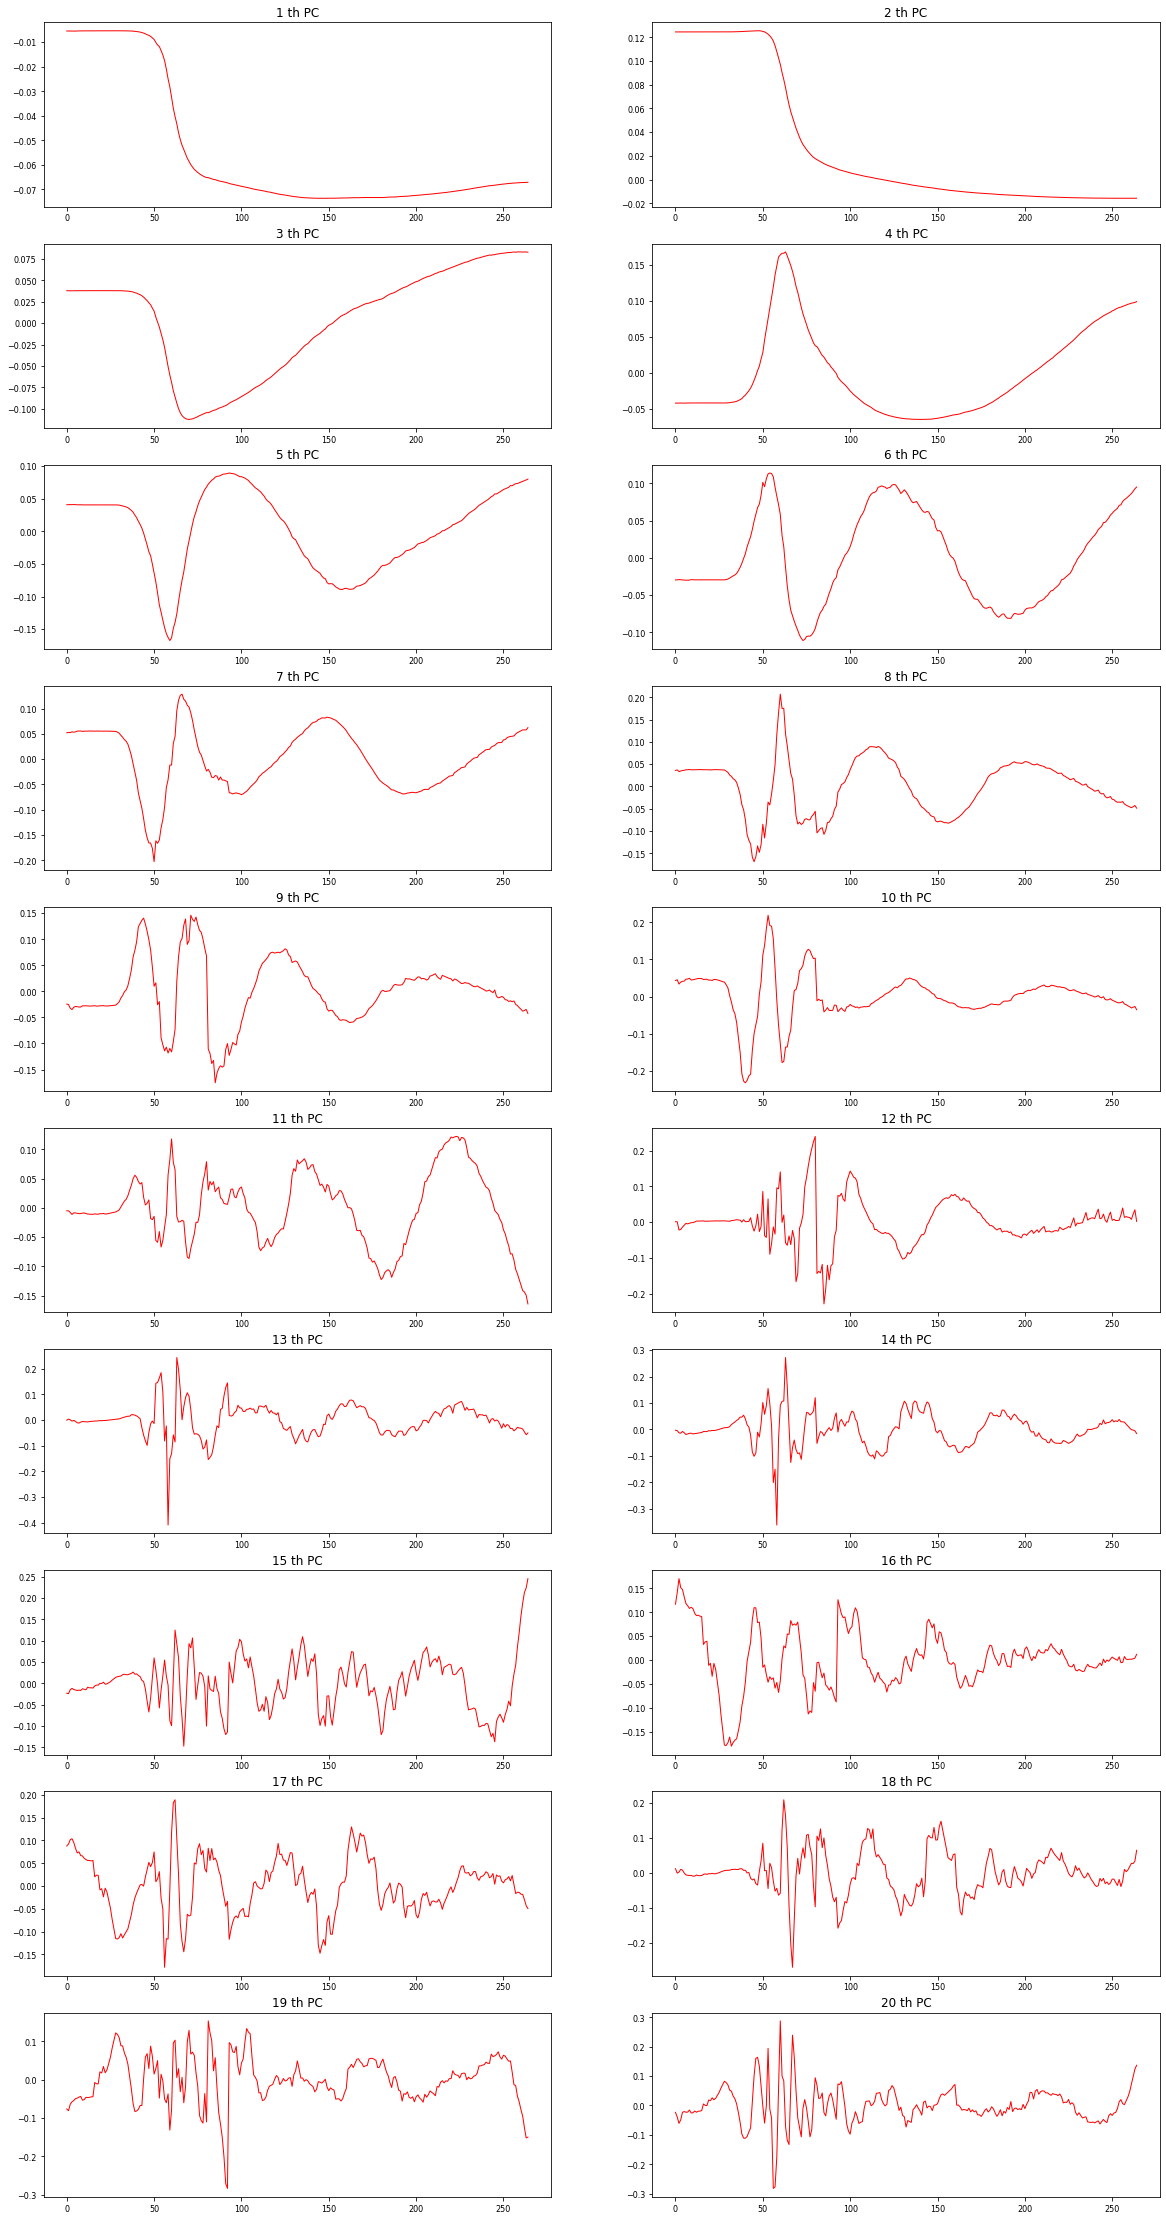

In [20]:
# Q5-Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots)
    
fig = plt.figure()
plt.xlabel('date', fontsize=40)

for i in range(20):
    plt.subplot(10, 2, (i+1))
    df_eV.loc[:,i+1].plot(figsize=(20,40), linewidth = 1, fontsize = 8, color='r')
    plt.title('{} th PC'.format(i+1))

### Q6
From the first 6 eigenvectors, we can see that the first two eigenvector represent the monotonically decreasing patterns of the original data. 

The third eigenvector captures the trend of fall first then rise, while the fourth eigenvector captures the trend of rise first then fall.

The fifth to eighth eigenvector may show the oscillations in the original data.

These patterns almost covers all important features in the original dataset.

But from 9th eigenvector to 20th, they are fluctuating over time, which means they captures the unimportant pattern of the original dataset. 

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [21]:
def plot(country):
  
  plt.figure(figsize=(15,10))
  plt.subplot(2,2,1)
  # Q1-plot the standardized time-series for the specified country: Afghanistan
  df_std.loc[country,:].plot(linewidth = 1, fontsize = 10)
  plt.title('standardized time-series for '+ country)
  plt.xlabel('Date')
  plt.ylabel('Standardized data compared to the World')

  # Q2-Plot the incremental reconstruction of China in a single plot with the 10 first principal components
  COUNT = 10 # count of first 10 eigenVectors used to reconstruct the image
  reconImages = []
  for numEvs in range (1,COUNT+1):
    W = eigenVectors[:, 0:numEvs]
    Project = np.dot (df_std.loc[country,:].values.reshape(1,-1), eigenVectors[:, 0:numEvs])
    Reconstruct = np.dot (Project, W.T)
    reconImages.append(Reconstruct.reshape(df_std.shape[1]))
  plt.subplot(2,2,2)
  for i in range(10):
    data = reconImages[i]        
    plt.plot(data,label='PC {}'.format(i+1))
    plt.title('Incremental Reconstruction of Standardized Time-series for '+ country)
    plt.xlabel('Date')
    plt.ylabel('Standardized data compared to the World')
    plt.legend()

  # to find RMSE and residual errors
  rmses,residuals,res_error = [],[],[]
  for i in range(COUNT):
    residual = reconImages[i]-df_std.loc[country,:].values
    res_error.append(residual.mean())
    residuals.append(residual)
    rmse = mean_squared_error(df_std.loc[country,:].values, reconImages[i].reshape(-1)) ** 0.5
    rmses.append(rmse)

  plt.subplot(2,2,3)
  # Q3-residual error of reconstruction plot 
  for i in range(10):
    plt.plot(residuals[i],label='PC {}'.format(i+1))
    plt.title('Residual error of Reconstruction for ' +country)
    plt.xlabel('Date')
    plt.legend()
    plt.ylabel("Residuals")

  plt.subplot(2,2,4)
  # Q4- RMSE of reconstruction plot 
  plt.plot(rmses)
  plt.title('RMSE for '+ country)
  plt.xlabel('# of PCs')
  plt.ylabel("RMSE")

  plt.tight_layout()
  plt.show()

  # Q5-Prints how many PCs are needed so that the RMSE would be less than 1 , 0.1 and 0.01
  list1, list2, list3 = [], [], []
  for i in range(10):
    if rmses[i] <= 1:
      list1.append(i)

    if rmses[i] <= 0.1:
      list2.append(i)

    if rmses[i] <= 0.01:
      list3.append(i)

  print('If we use', list1[0]+1, 'PCs, the RMSE will be less than 1 for ' + country)
  print('If we use', list2[0]+1, 'PCs, the RMSE will be less than 0.1 for ' + country)

  if len(list3) == 0:
    print("none for " + country + ', if we only consider first 10PCs')
  else:
    print('If we use', list3[0]+1, 'PCs, the RMSE will be less than 0.01 for '  + country)


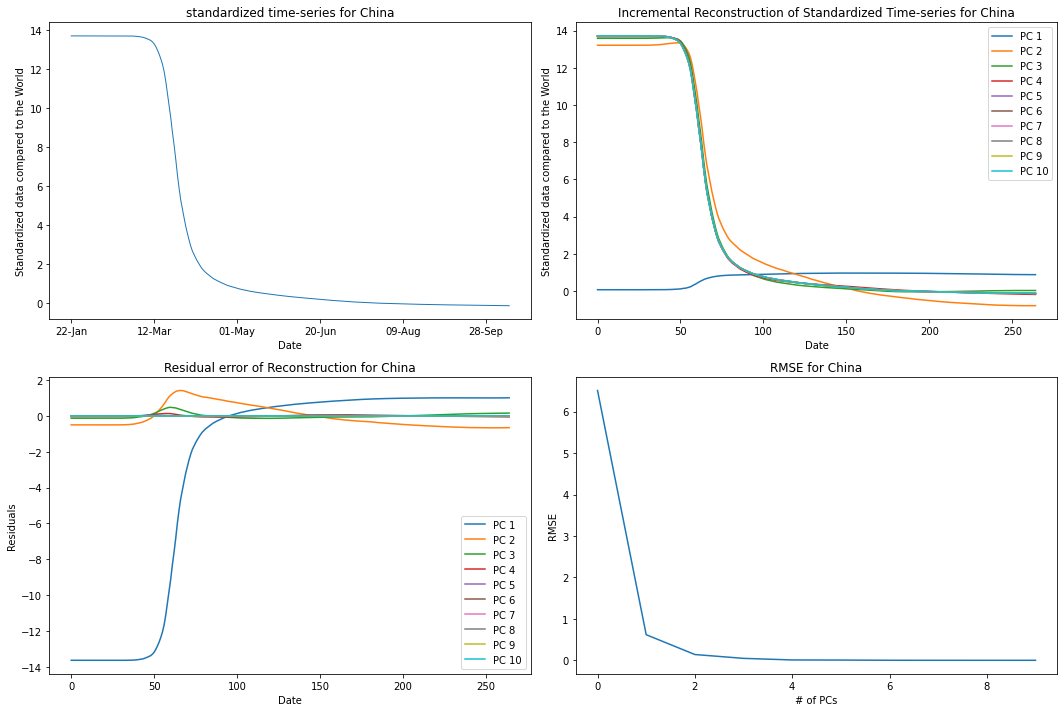

If we use 2 PCs, the RMSE will be less than 1 for China
If we use 4 PCs, the RMSE will be less than 0.1 for China
If we use 5 PCs, the RMSE will be less than 0.01 for China


In [22]:
plot('China')

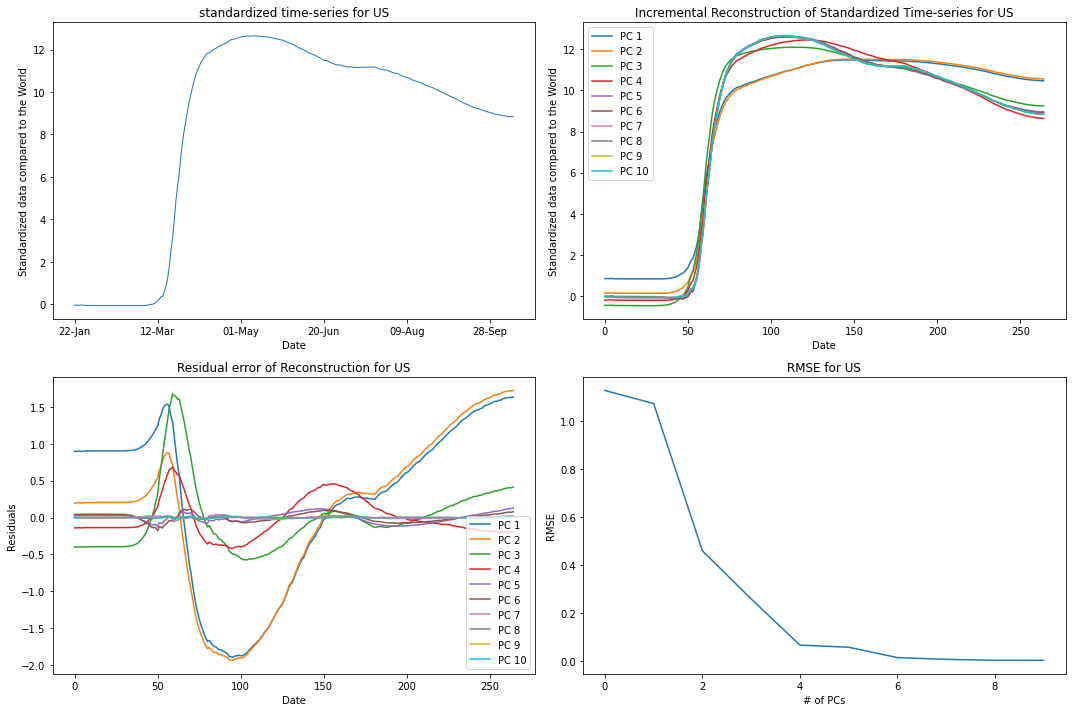

If we use 3 PCs, the RMSE will be less than 1 for US
If we use 5 PCs, the RMSE will be less than 0.1 for US
If we use 8 PCs, the RMSE will be less than 0.01 for US


In [23]:
plot('US')

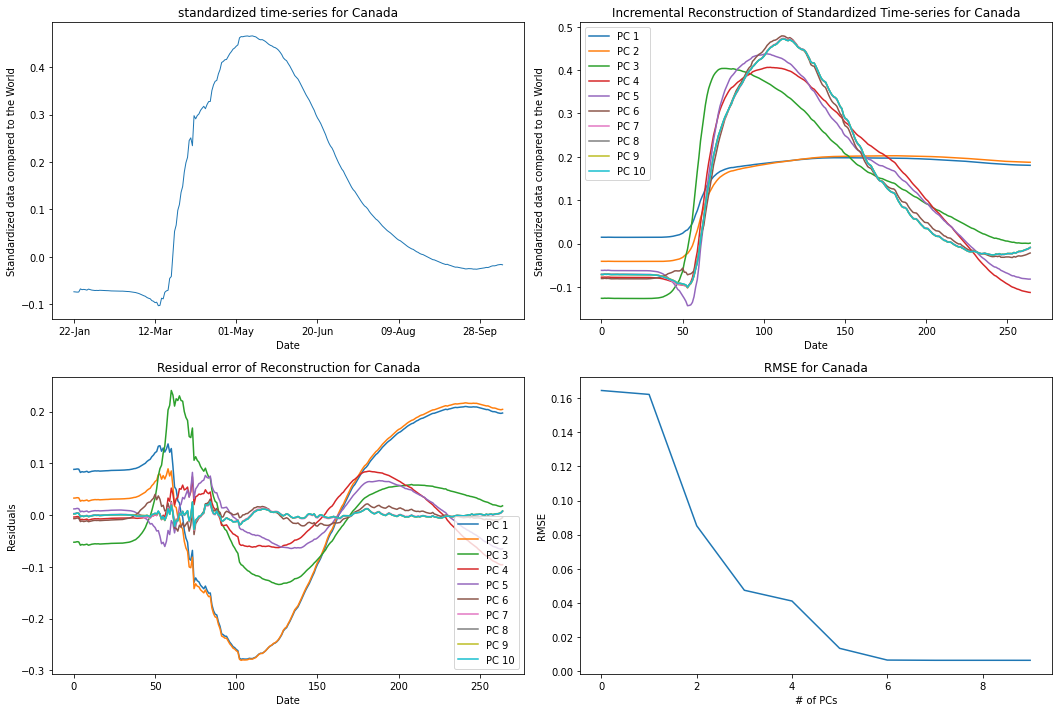

If we use 1 PCs, the RMSE will be less than 1 for Canada
If we use 3 PCs, the RMSE will be less than 0.1 for Canada
If we use 7 PCs, the RMSE will be less than 0.01 for Canada


In [24]:
plot('Canada')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [25]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [26]:
df.columns

Index(['22-Jan', '23-Jan', '24-Jan', '25-Jan', '26-Jan', '27-Jan', '28-Jan',
       '29-Jan', '30-Jan', '31-Jan',
       ...
       '03-Oct', '04-Oct', '05-Oct', '06-Oct', '07-Oct', '08-Oct', '09-Oct',
       '10-Oct', '11-Oct', '12-Oct'],
      dtype='object', length=265)

In [27]:
df = death_raw
columns = df.columns
index = df.index

In [28]:
# extract 10 countries data
names, countries = [],[]
for i in ['US', 'China', 'Canada', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',  
          'Antigua and Barbuda', 'Argentina']:
    df_each = df.loc[[i]]
    name = i
    y = df_each
    names.append(name)
    countries.append(y)

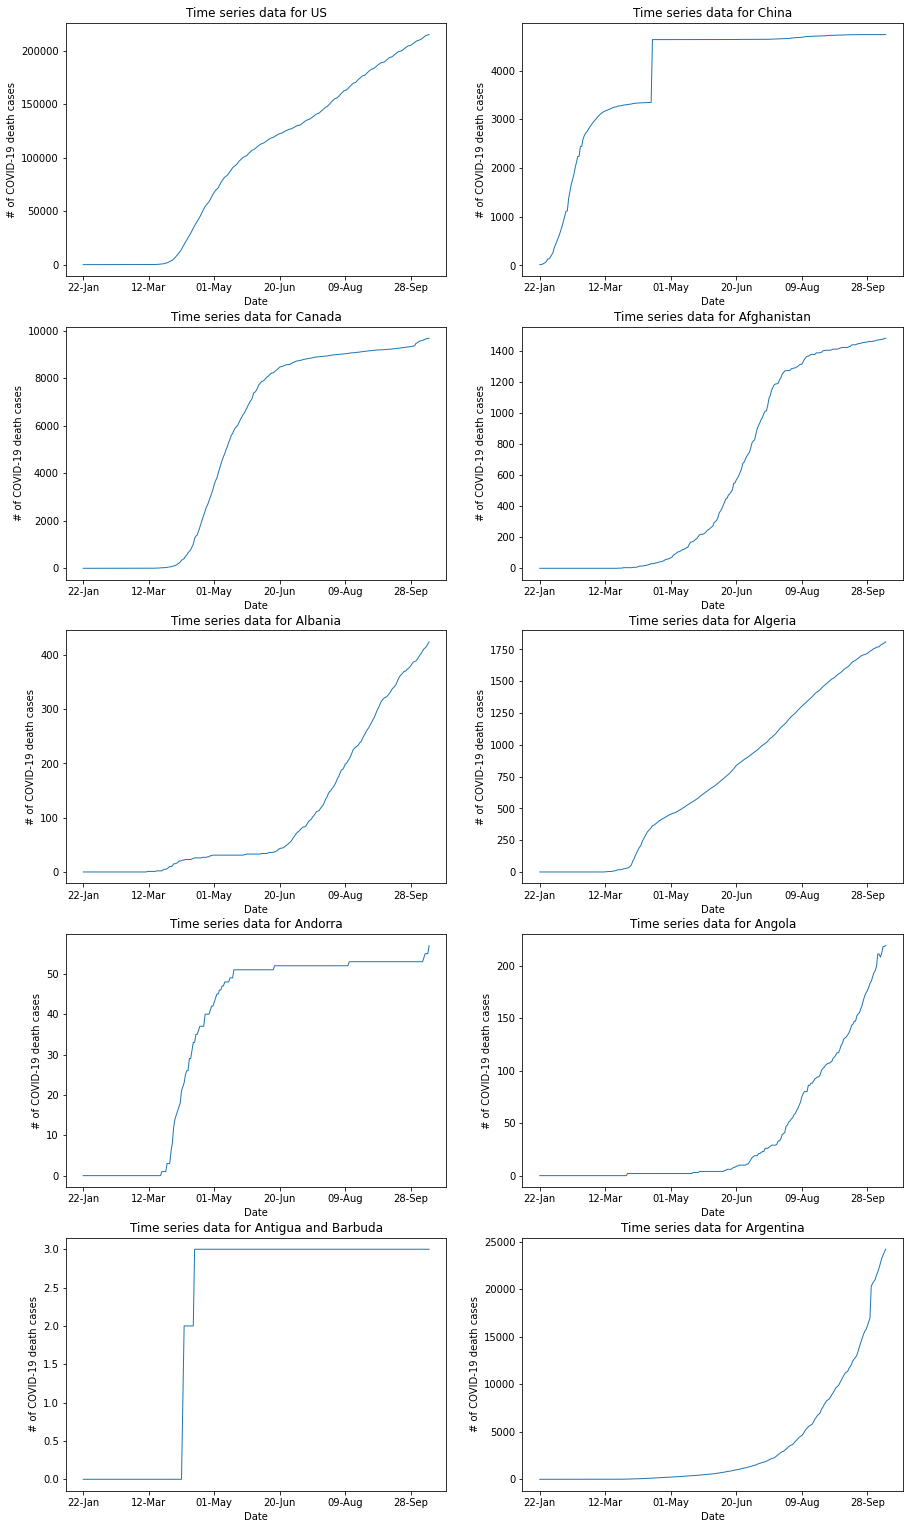

In [29]:
# subplots for 10 countries
fig = plt.figure()
plt.xlabel('date', fontsize=30);

for i in range(10):
    plt.subplot(5, 2, (i+1))
    df.loc[names[i],:].plot(figsize=(15,27), linewidth = 1, fontsize = 10)
    
    plt.xlabel('Date')
    plt.ylabel('# of COVID-19 death cases')
    plt.title('Time series data for ' + names[i])

In [30]:
# standardize the data
X = df.values.astype(int)
X_std = StandardScaler().fit_transform(X)

In [31]:
# Create dataframe for standardized data
df_std = pd.DataFrame(X_std, columns = columns, index = index)
df_std

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.173799,-0.174384,-0.174875,-0.175189,-0.177106,-0.177539,-0.177898,-0.178380,-0.178777,-0.179201,-0.179609,-0.179949,-0.180302,-0.180240,-0.180716,-0.181090,-0.181569,-0.181833,-0.182178,-0.182609,-0.183125,-0.183302,-0.183810,-0.184133,-0.184551,-0.184971,-0.185306,-0.185785,-0.186911,-0.187394,-0.187532,-0.187947,-0.188484,-0.188943,-0.189315,-0.189803,-0.190219,-0.190626,-0.190875,-0.191285
Albania,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.234208,-0.234136,-0.233990,-0.234048,-0.235777,-0.236017,-0.236001,-0.236008,-0.235852,-0.235826,-0.235841,-0.236040,-0.235915,-0.235869,-0.235838,-0.235627,-0.235582,-0.235693,-0.235919,-0.235938,-0.236094,-0.236136,-0.236205,-0.236262,-0.236443,-0.236679,-0.236668,-0.236692,-0.237483,-0.237714,-0.237630,-0.237721,-0.237994,-0.238121,-0.238155,-0.238255,-0.238422,-0.238560,-0.238683,-0.238893
Algeria,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.167257,-0.167341,-0.167331,-0.167455,-0.169237,-0.169383,-0.169378,-0.169389,-0.169430,-0.169590,-0.169668,-0.169886,-0.169753,-0.169603,-0.169681,-0.169921,-0.170156,-0.170302,-0.170485,-0.170538,-0.170719,-0.170986,-0.171367,-0.171656,-0.171964,-0.172273,-0.172489,-0.172571,-0.173536,-0.173696,-0.173767,-0.174032,-0.174458,-0.175030,-0.175427,-0.175482,-0.175790,-0.176024,-0.176221,-0.176393
Andorra,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.247729,-0.247841,-0.247946,-0.248172,-0.250016,-0.250303,-0.250236,-0.250257,-0.250159,-0.250216,-0.250390,-0.250746,-0.250612,-0.250628,-0.250719,-0.250720,-0.250849,-0.251118,-0.251394,-0.251472,-0.251699,-0.251629,-0.251758,-0.251834,-0.252068,-0.252408,-0.252498,-0.252567,-0.253316,-0.253530,-0.253503,-0.253736,-0.254110,-0.254298,-0.254434,-0.254589,-0.254718,-0.254931,-0.255192,-0.255455
Angola,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0

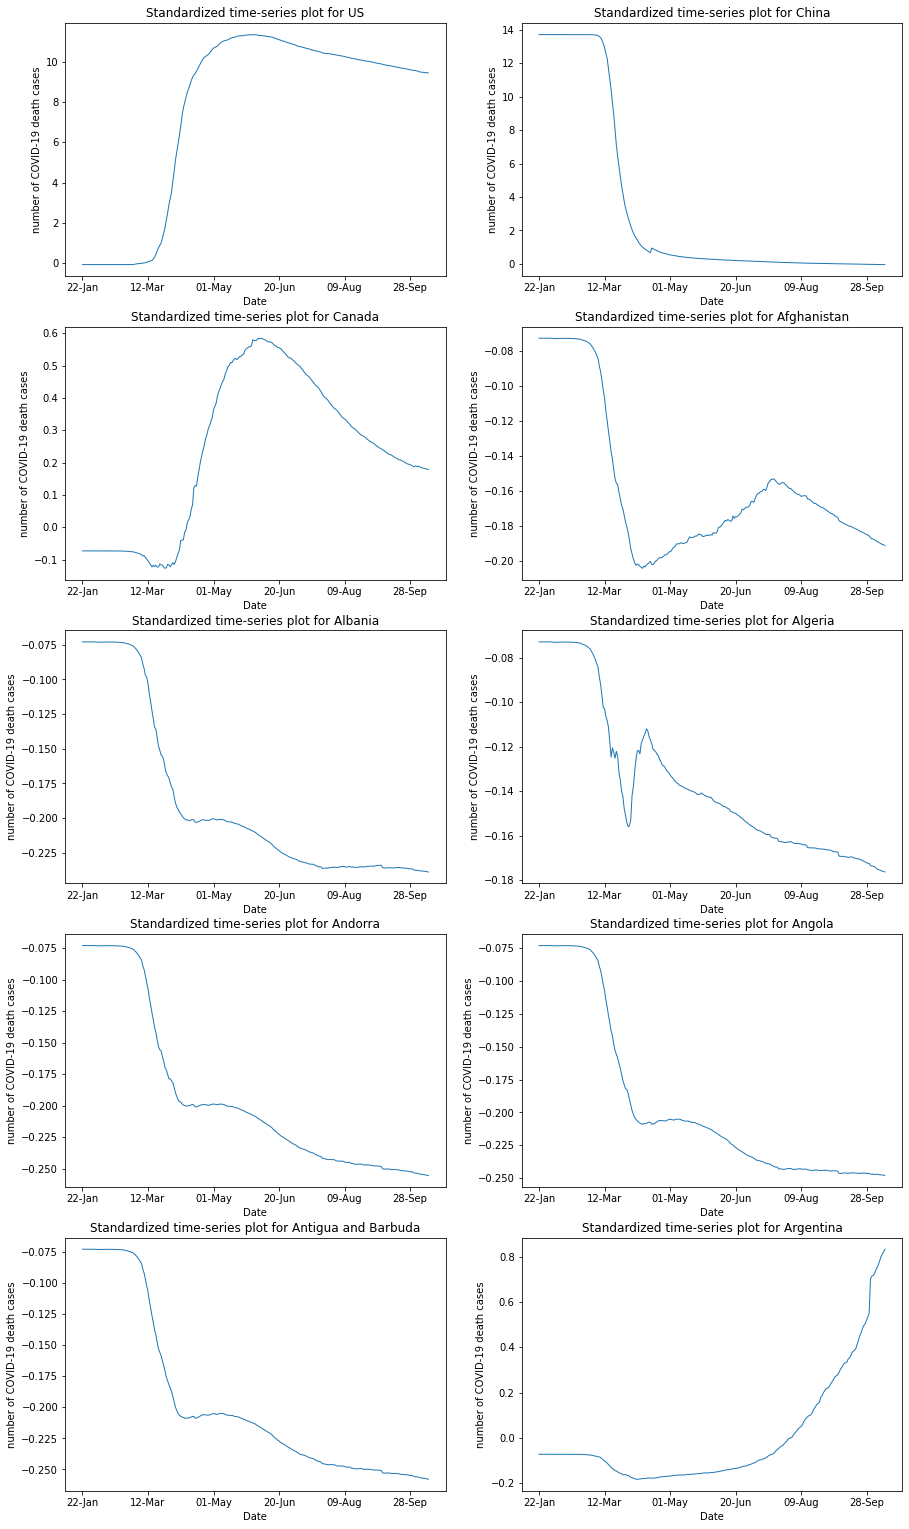

In [32]:
# extract 10 countries standardization data
names, countries = [],[]
for i in ['US', 'China', 'Canada', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',  
          'Antigua and Barbuda', 'Argentina']:
    df_each = df_std.loc[[i]]
    name = i
    y = df_each
    names.append(name)
    countries.append(y)
    
# subplots for 10 countries after standardization
fig = plt.figure()
plt.xlabel('date', fontsize=30);

for i in range(10):
    plt.subplot(5, 2, (i+1))
    df_std.loc[names[i],:].plot(figsize=(15,27), linewidth = 1, fontsize = 10)
    
    plt.xlabel('Date')
    plt.ylabel('number of COVID-19 death cases')
    plt.title('Standardized time-series plot for ' + names[i])

In [33]:
# Compute the covariance matrix of the dataframe
mean = X.mean(axis=0)

#use svd to calculate eigenvalues and eigenvectorsd
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1)

In [34]:
# Compute eigenvalues and eigenvectors
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[ 0.          0.          0.         ...  0.04110795  0.12769635
  -0.00416301]
 [-0.2842075  -0.0820835  -0.05873721 ...  0.04110795  0.12769635
  -0.00416301]
 [-0.08795231 -0.13334382  0.01169761 ...  0.04110795  0.12769635
  -0.00416301]
 ...
 [ 0.00393198  0.00029303 -0.0160335  ...  0.0725345  -0.01386481
  -0.06885824]
 [ 0.01364877  0.00389648 -0.00340188 ...  0.07266572 -0.0138748
  -0.06881917]
 [-0.01021655 -0.01668011  0.0093431  ...  0.07269117 -0.01387614
  -0.06879268]]  
 Eig Val: 
 [-5.50725401e-14 -5.01883643e-14 -4.54839054e-14 -3.97793217e-14
 -3.54622317e-14 -3.08800494e-14 -3.06318219e-14 -3.04020609e-14
 -2.58626230e-14 -2.16394955e-14 -1.57665702e-14 -1.36515181e-14
 -1.33808951e-14 -1.28771121e-14 -1.07367346e-14 -8.03067315e-15
 -8.01123038e-15 -7.60835939e-15 -7.01513504e-15 -5.42343145e-15
 -5.39357078e-15 -4.97573236e-15 -4.63169212e-15 -4.02474821e-15
 -3.96937495e-15 -3.30207980e-15 -3.25970853e-15 -2.99605373e-15
 -2.81292262e-15 -2.71236659e

In [35]:
# sorted
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [36]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#cumExpVar

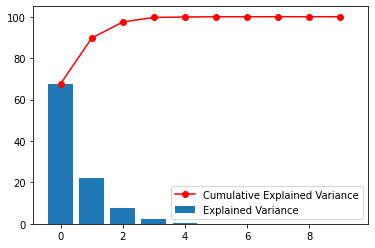

In [37]:
# scree plot
plt.bar(range(10), expVar[:10], label='Explained Variance')
plt.plot(cumExpVar[:10], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [38]:
# How many PCs do you need to cover 99% of the dataset's variance?
for i in range(10):
    if cumExpVar[:10][i] >= 99.0:
        #print(i+1)
        break
print('We need {} PCs to cover 99% of the variance'.format(i+1))
# Thus, We need 4 PCs to cover 99% of the dataset's variance.

We need 4 PCs to cover 99% of the variance


In [39]:
# create a DataFrame for eigenVectors in order to plot the first 20 principal components (Eigenvectors)
df_eV = pd.DataFrame(eigenVectors, columns = range(1, 266))
df_eV

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,-0.004163,0.127696,0.041108,-0.036996,-0.029285,0.027061,0.021110,0.001300,-0.005258,0.062467,-0.006512,0.008751,-0.008740,-0.045819,0.021802,0.006995,-0.006299,-0.005309,-0.013017,-0.005503,0.009435,-0.045245,0.039508,-0.002828,0.060309,-0.024026,0.056180,-0.015860,-0.066113,0.084109,0.015107,-0.033760,-0.002444,-0.004883,0.022752,0.018768,0.023814,0.001776,0.008525,0.028099,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004163,0.127696,0.041108,-0.036996,-0.029285,0.027061,0.021110,0.001300,-0.005258,0.062467,-0.006512,0.008751,-0.008740,-0.045819,0.021802,0.006995,-0.006299,-0.005309,-0.013017,-0.005503,0.009435,-0.045245,0.039508,-0.002828,0.060309,-0.024026,0.056180,-0.015860,-0.066113,0.084109,0.015107,-0.033760,-0.002444,-0.004883,0.022752,0.018768,0.023814,0.001776,0.008525,0.028099,...,-0.004489,0.002076,0.001780,-0.000118,0.020842,0.010943,-0.009715,-0.005462,-0.047423,0.077505,0.016428,0.005357,0.004103,-0.015694,-0.016765,-0.019131,-0.025155,0.001637,-0.055478,0.000378,-0.029694,0.051514,0.048339,0.115157,-0.086006,-0.090548,0.028126,0.037994,0.075948,-0.080233,-0.004446,-0.176174,0.122340,-0.083191,-0.193892,0.187640,-0.138631,-0.058737,-0.082083,-0.284207
2,-0.004163,0.127696,0.041108,-0.036996,-0.029285,0.027061,0.021110,0.001300,-0.005258,0.062467,-0.006512,0.008751,-0.008740,-0.045819,0.021802,0.006995,-0.006299,-0.005309,-0.013017,-0.005503,0.009435,-0.045245,0.039508,-0.002828,0.060309,-0.024026,0.056180,-0.015860,-0.066113,0.084109,0.015107,-0.033760,-0.002444,-0.004883,0.022752,0.018768,0.023814,0.001776,0.008525,0.028099,...,0.000874,-0.005058,-0.001218,-0.021050,-0.024241,-0.001920,-0.012557,0.012893,0.002053,0.002952,0.074029,0.008340,0.009391,-0.000057,-0.009399,-0.010708,-0.001700,-0.013203,-0.029177,0.035791,0.084227,-0.023655,-0.055154,-0.059384,-0.028037,0.017193,0.046167,-0.131179,0.099868,-0.080070,-0.108787,0.046941,-0.541102,0.162239,0.200600,-0.322116,0.089963,0.011698,-0.133344,-0.087952
3,-0.004163,0.127696,0.041108,-0.036996,-0.029285,0.027061,0.021110,0.001300,-0.005258,0.062467,-0.006512,0.008751,-0.008740,-0.045819,0.021802,0.006995,-0.006299,-0.005309,-0.013017,-0.005503,0.009435,-0.045245,0.039508,-0.002828,0.060309,-0.024026,0.056180,-0.015860,-0.066113,0.084109,0.015107,-0.033760,-0.002444,-0.004883,0.022752,0.018768,0.023814,0.001776,0.008525,0.028099,...,-0.009843,-0.028448,0.000511,0.066312,0.054212,0.022760,0.071881,0.024484,-0.066216,0.075189,-0.184824,-0.094459,-0.084210,0.102727,0.082084,-0.038429,0.018341,0.081954,0.057088,-0.080231,-0.110675,0.083592,0.183695,0.020300,-0.042466,0.011528,-0.004101,0.032533,0.127186,-0.080055,-0.030339,-0.060436,-0.161133,0.018479,0.127004,-0.030591,0.015064,-0.005006,-0.063071,-0.031803
4,-0.004163,0.127696,0.041108,-0.036996,-0.029285,0.027061,0.021110,0.001300,-0.005258,0.062467,-0.006512,0.008751,-0.008740,-0.045819,0.021802,0.006995,-0.006299,-0.005309,-0.013017,-0.005503,0.009435,-0.045245,0.039508,-0.002828,0.060309,-0.024026,0.056180,-0.015860,-0.066113,0.084109,0.015107,-0.033760,-0.002444,-0.004883,0.022752,0.018768,0.023814,0.001776,0.008525,0.028099,...,-0.043306,-0.010968,0.013378,0.024266,-0.025210,-0.038030,0.015473,0.037754,-0.015057,0.002675,-0.015376,0.011224,0.007815,0.022209,0.035427,0.019741,0.068580,-0.006730,-0.089063,-0.036709,-0.003557,0.026200,0.031251,-0.095679,0.057423,0.185035,-0.150979,-0.357685,-0.487740,-0.080049,0.028707,-

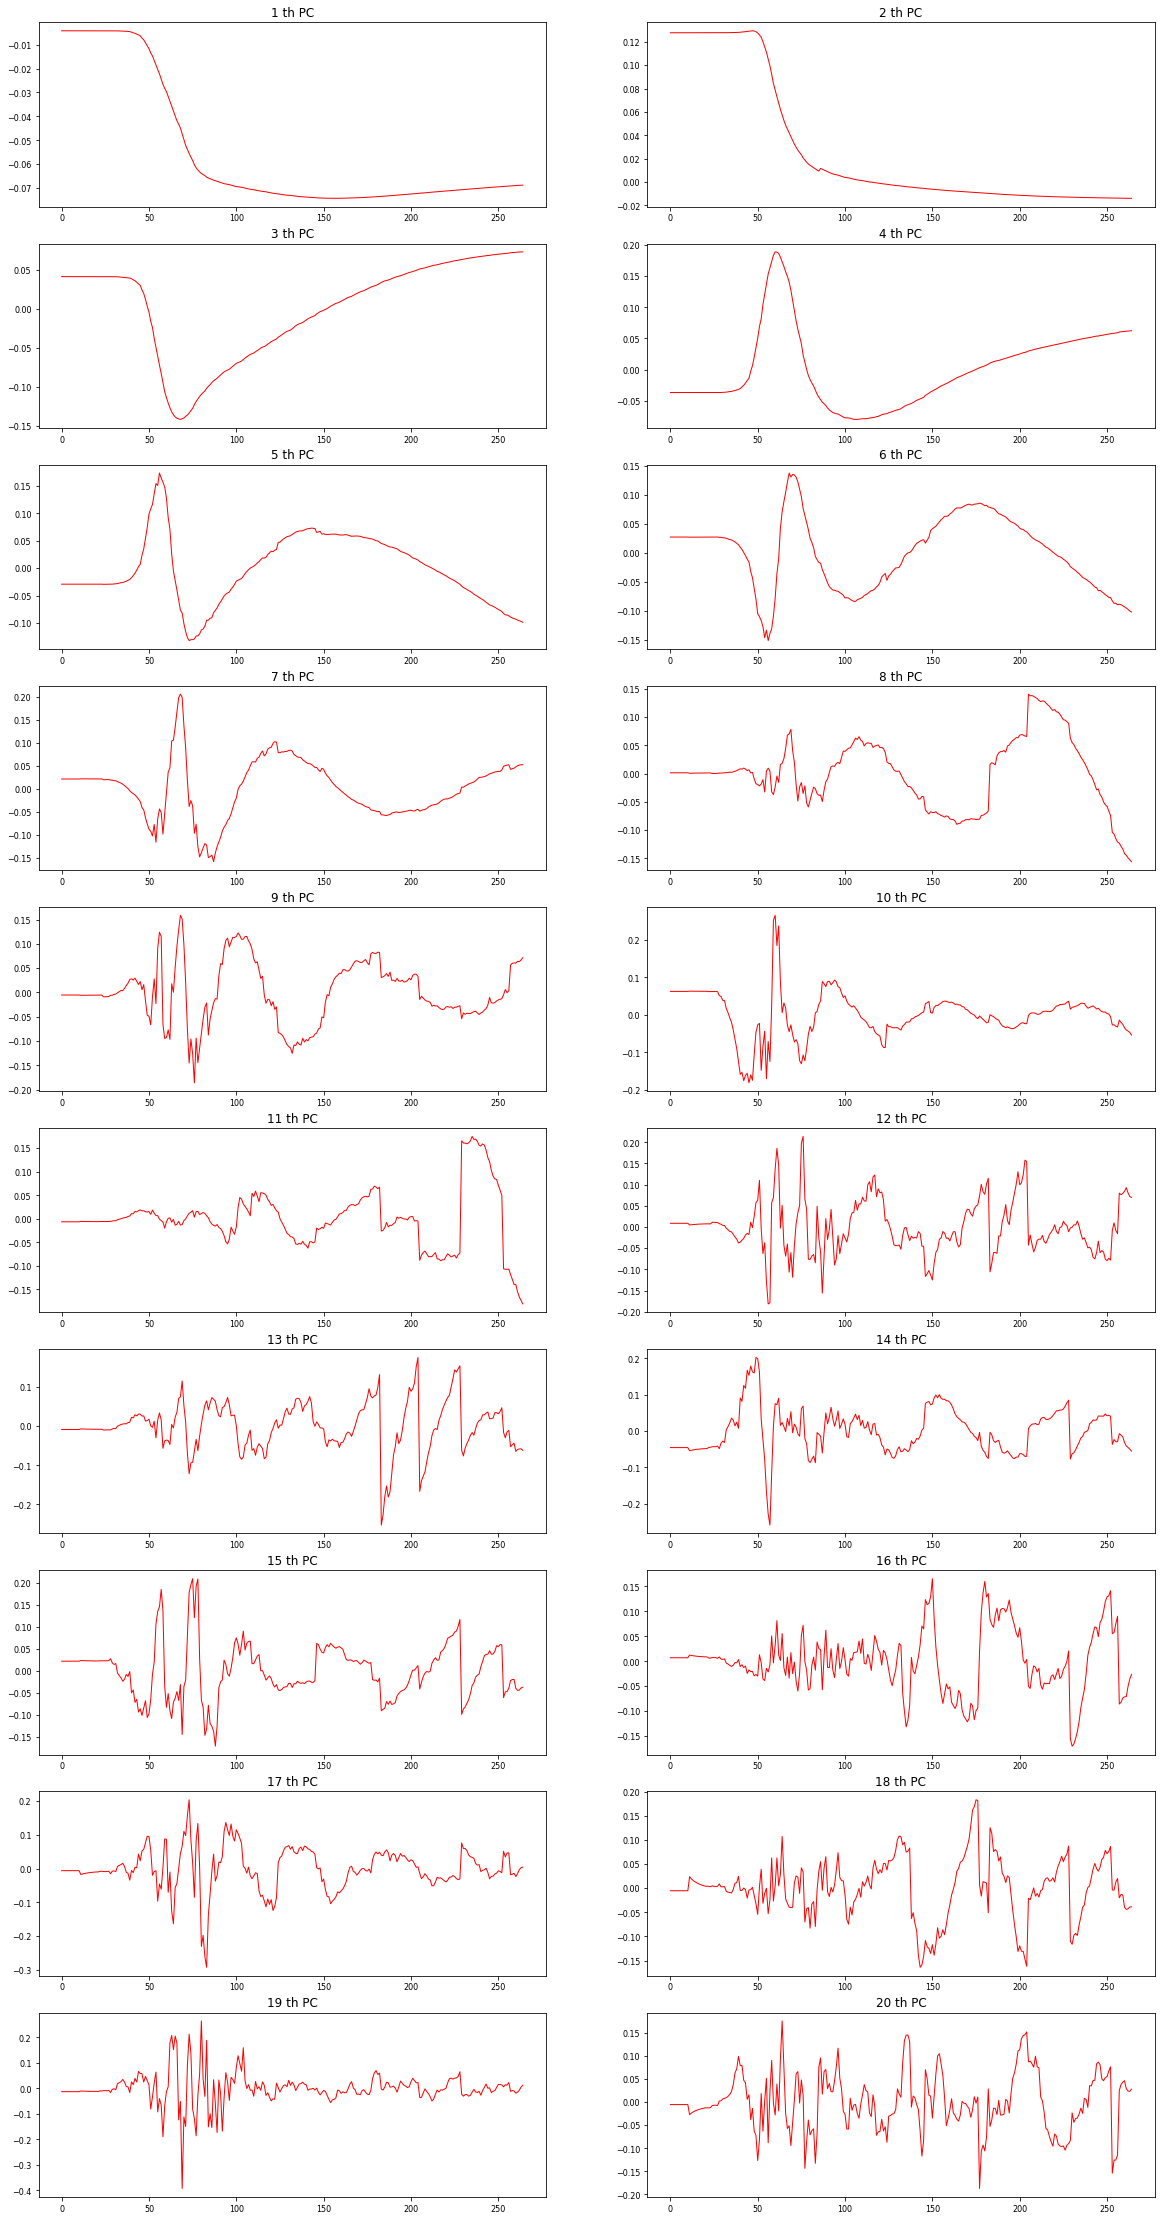

In [40]:
# Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots)
    
fig = plt.figure()
plt.xlabel('date', fontsize=40)

for i in range(20):
    plt.subplot(10, 2, (i+1))
    df_eV.loc[:,i+1].plot(figsize=(20,40), linewidth = 1, fontsize = 8, color='r')
    plt.title('{} th PC'.format(i+1))

## US

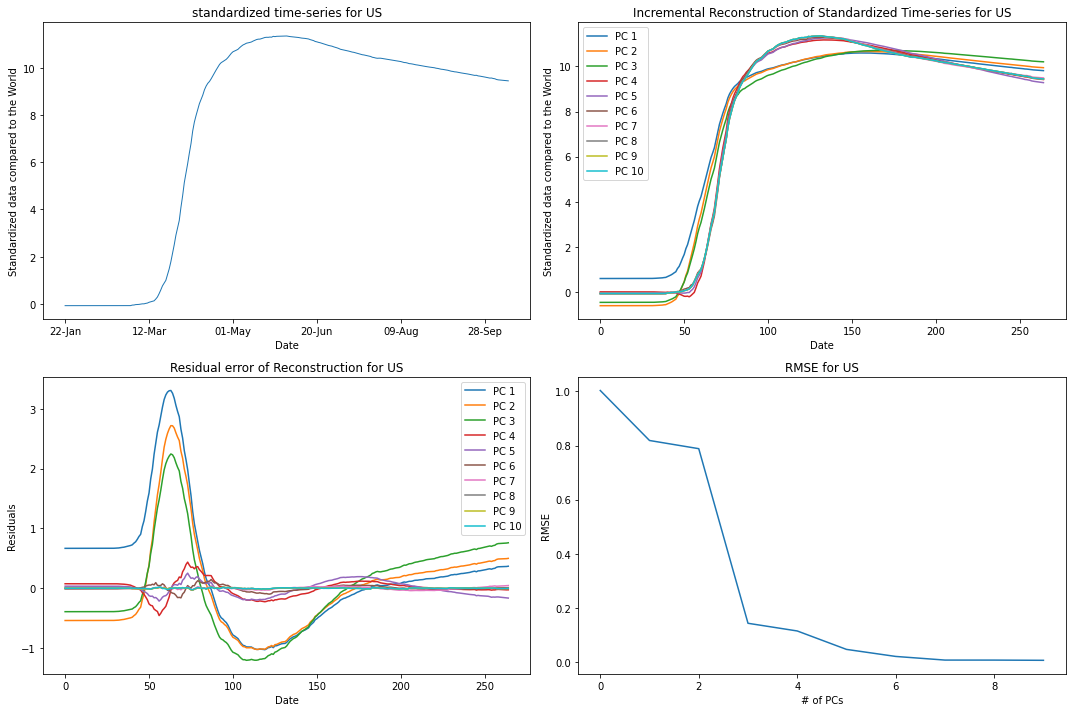

If we use 2 PCs, the RMSE will be less than 1 for US
If we use 6 PCs, the RMSE will be less than 0.1 for US
If we use 8 PCs, the RMSE will be less than 0.01 for US


In [41]:
plot('US')

## Canada

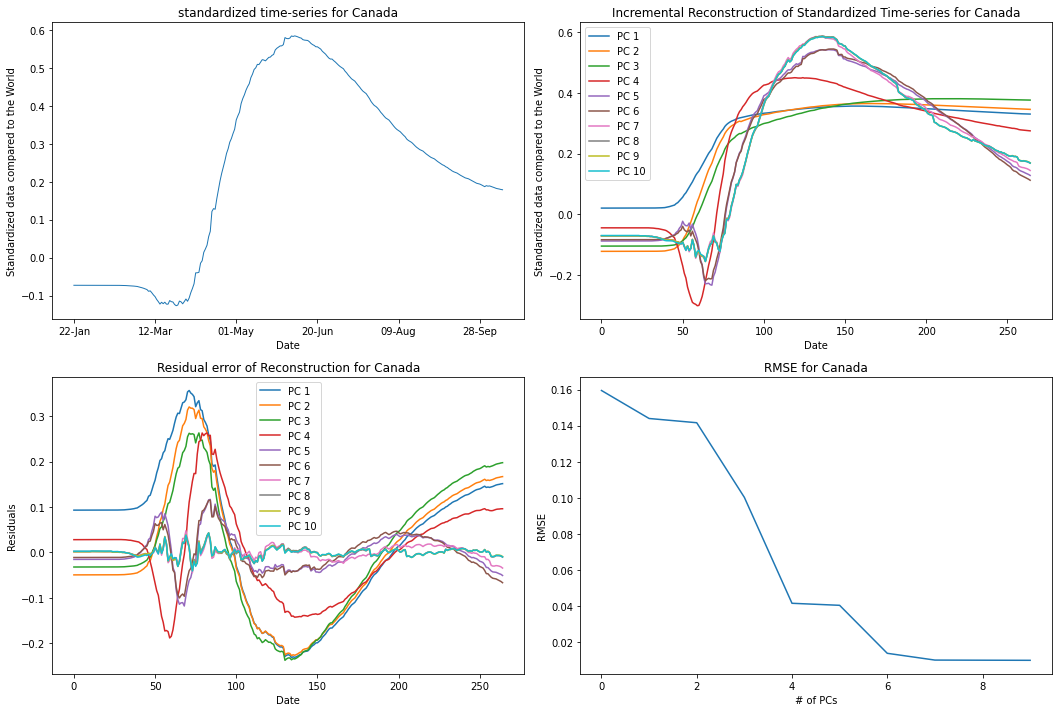

If we use 1 PCs, the RMSE will be less than 1 for Canada
If we use 5 PCs, the RMSE will be less than 0.1 for Canada
none for Canada, if we only consider first 10PCs


In [42]:
plot('Canada')

As we can see, there is no way to let RMSE below than 0.01 if we only use 10 first PCs in Canada.

In [66]:
reconImages = []
for numEvs in range (1,266):
  W = eigenVectors[:, 0:numEvs]
  Project = np.dot (df_std.loc['Canada',:].values.reshape(1,-1), eigenVectors[:, 0:numEvs])
  Reconstruct = np.dot (Project, W.T)
  reconImages.append(Reconstruct.reshape(df_std.shape[1]))

In [67]:
rmses,residuals,res_error = [],[],[]
for i in range(265):
  residual = reconImages[i]-df_std.loc['Canada',:].values
  res_error.append(residual.mean())
  residuals.append(residual)
  rmse = mean_squared_error(df_std.loc['Canada',:].values, reconImages[i].reshape(-1)) ** 0.5
  rmses.append(rmse)

In [69]:
list4 = []
for i in range(265):
  if rmses[i] <= 0.01:
    list4.append(i)
print('If we use', list4[0]+1, 'PCs, the RMSE will be less than 0.01 for Canada if we consider all PCs')

If we use 11 PCs, the RMSE will be less than 0.01 for Canada if we consider all PCs


## China

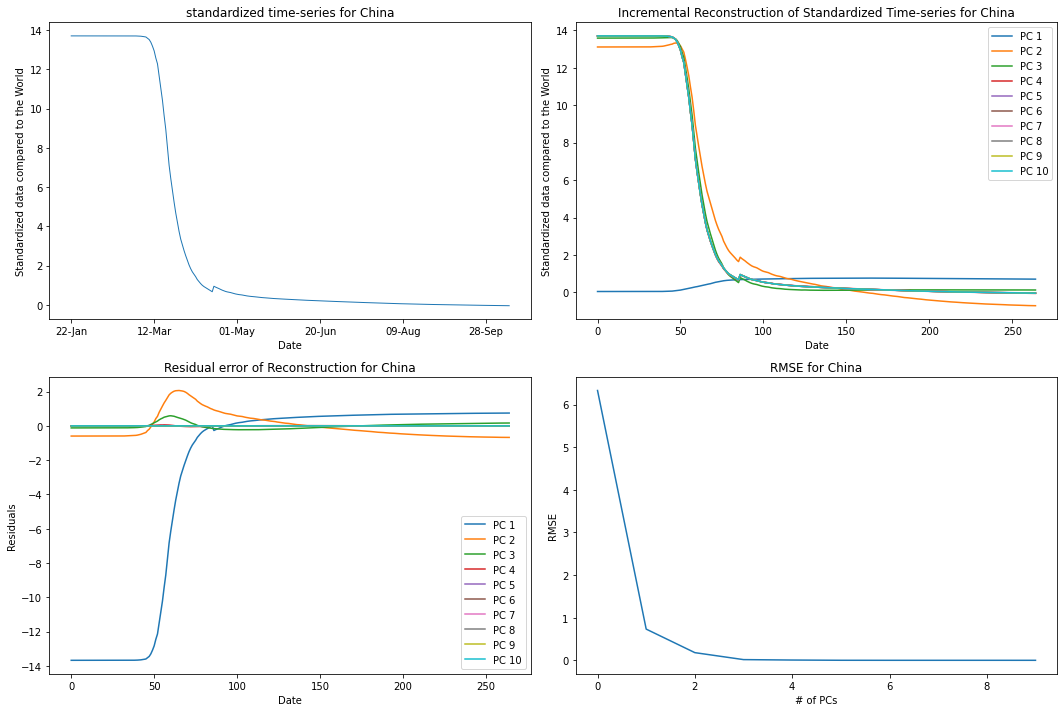

If we use 2 PCs, the RMSE will be less than 1 for China
If we use 4 PCs, the RMSE will be less than 0.1 for China
If we use 5 PCs, the RMSE will be less than 0.01 for China


In [ ]:
plot('China')

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
# Creating a mean image from all dataset images
def asRowMatrix(x):
    if len(x) == 0: return np.array([])
    rowMatrix = np.empty((0, x[2].reshape(28,28).size), dtype = x[0].dtype)
    for img in x:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

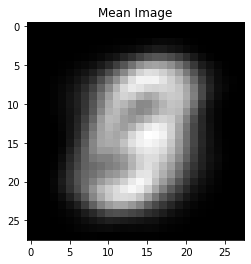

In [ ]:
XMat = asRowMatrix(x);
meanImage = np.reshape(XMat.mean(axis=0), x[2].reshape(28,28).shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Image')
plt.show()

In [ ]:
XMat.shape

(1000, 784)

In [ ]:
# Q1: Compute Covariance matrix and perform eigendecomposition.
mean = XMat.mean(axis=0)
X = XMat - mean
C = np.dot(X.T,X)
eigenValues, eigenVectors = np.linalg.eigh(C)
#print('Covariance matrix is', C)
#print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

In [ ]:
# shape of Covanriance matrix
C.shape

(784, 784)

In [ ]:
# sorted eigenVectors in descending order by their eigenValue
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [ ]:
#select based on numOfBasis
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
print('Number of useful eigenBasis are: ', numOfBasis)
eigenValues = eigenValues[0:numOfBasis].copy()
eigenVectors = eigenVectors[:, 0:numOfBasis].copy()

Number of useful eigenBasis are:  213


In [ ]:
# Dimension of eigenValues and eigenVectors
print('the shape of eigenValues is', eigenValues.shape , 'the shape of eigenVectors is', eigenVectors.shape)

the shape of eigenValues is (213,) the shape of eigenVectors is (784, 213)


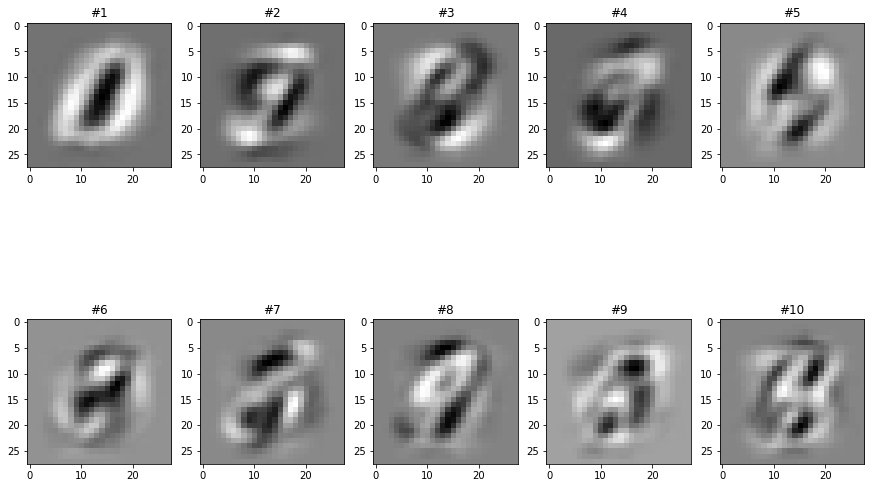

In [ ]:
# Q2: print first 10 eigen images
COUNT = 10
ROWS = math.ceil(COUNT/5)
fig = plt.figure(figsize=(15, ROWS * 5))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

The first few PCs capture the most useful informations of the original dataset, but it captures less and less meaningful information as we going further, which provide unimportant informations for us. 

In [ ]:
# Q3: define function for generating random image and n plots for incremental reconstruction
def p5q3(n):
  
  # create reconstructed images
  reconImages = []
  z = np.random.randint(0, 999)
  numEvs = n
  W = eigenVectors[:, 0:numEvs]
  X = x[z].reshape(1, -1)
  Project = np.dot((X - mean), W)
  Reconstruct = np.dot(Project, W.T) + mean
  reconImages = Reconstruct.reshape(28,28)

  # plot reconstructed images
  plt.imshow(reconImages, cmap = plt.cm.gray)
  plt.title('Reconstructed using ' + str(n) + ' Components')


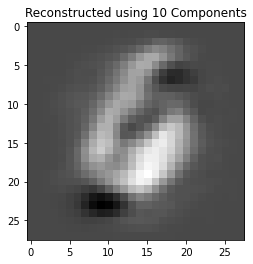

In [ ]:
# Q4: let's try the function by using 10, 20, 30, 45, 50, 60, 65
p5q3(10)

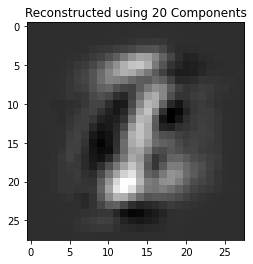

In [ ]:
p5q3(20)

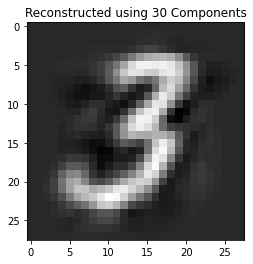

In [ ]:
# count of first 10 eigenVectors used to reconstruct the image
p5q3(30)

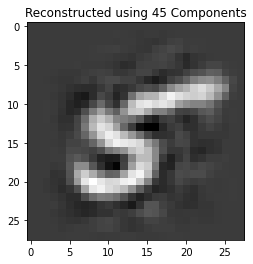

In [ ]:
p5q3(45)

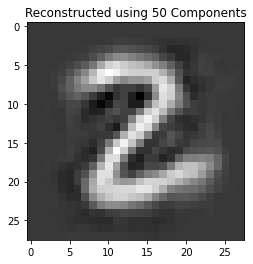

In [ ]:
p5q3(50)

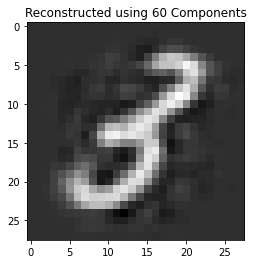

In [ ]:
p5q3(60)

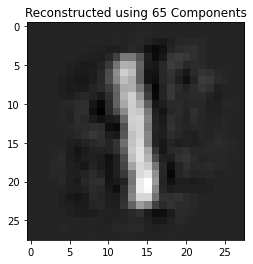

In [ ]:
p5q3(65)

Generally speaking, from the above graphs, we can see that humans can identify the digits clearly by using first 65 PCs. Since we are generating random image from the dataset here, so for some images, we are able to see the number only use the first 20 or 30 PCs. But for some images, we need to use the first 60 or 65 Pcs to identify the number clearly. Therefore, we set n equal to 65 just in case. 

In [ ]:
# Q5: to find compression ratio
n = 65
num = x.size
den = (784*n)+(1000*n)
compression_raio = num/den
print('The compression ratio is {} if we use first 65 Principal Components'.format(compression_raio))

The compression ratio is 6.760952052431873 if we use first 65 Principal Components


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


